## Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from astropy.table import Table, Column

## Read, Understand and Pre-process Train/Test Data
___
### Understand Data

In [2]:
TD=pd.read_csv("C:\\Users\\AWAB\\Desktop\\test\\train.csv")
Train_Dataset=pd.DataFrame(TD)
 
print("Train Dataset:") 
Train_Dataset

Train Dataset:


,comment_text,gender
0,r u cmng or u not cmng,male
1,r you cmng,female
2,"I am fine, r u fine",male
3,m fn and you,female
4,"my frnd is gr8, wll dn.",male
5,my best friend is great,female


In [3]:
print("Train Dataset Columns:") 
print(Train_Dataset.columns)
print("\nTrain instances:",Train_Dataset.shape[0])

Train Dataset Columns:
Index(['comment_text', 'gender'], dtype='object')

Train instances: 6


In [4]:
TED=pd.read_csv("C:\\Users\\AWAB\\Desktop\\test\\test.csv")
Test_Dataset=pd.DataFrame(TED)
 
print("Test Dataset:") 
Test_Dataset

Test Dataset:


,comment_text,gender
0,"plz go out, plz out with with frnd",male
1,"r u going to walk, r u?",female
2,r you fine,male
3,are you fine,female


In [5]:
print("Test Dataset Columns:") 
print(Test_Dataset.columns)
print("\nTest instances:",Test_Dataset.shape[0])

Test Dataset Columns:
Index(['comment_text', 'gender'], dtype='object')

Test instances: 4


In [6]:
print("Comments by 'Male' in Train Dataset:\n")
print(Train_Dataset.loc[Train_Dataset['gender']=='male'])

print("\n\nComments by 'Female' in Train Dataset:\n")
print(Train_Dataset.loc[Train_Dataset['gender']=='female'])

Comments by 'Male' in Train Dataset:

              comment_text gender
0   r u cmng or u not cmng   male
2      I am fine, r u fine   male
4  my frnd is gr8, wll dn.   male


Comments by 'Female' in Train Dataset:

              comment_text  gender
1               r you cmng  female
3             m fn and you  female
5  my best friend is great  female


In [7]:
print("Comments by 'Male' in Test Dataset:\n")
print(Test_Dataset.loc[Test_Dataset['gender']=='male'])

print("\n\nComments by 'Female' in Test Dataset:\n")
print(Test_Dataset.loc[Test_Dataset['gender']=='female'])

Comments by 'Male' in Test Dataset:

                         comment_text gender
0  plz go out, plz out with with frnd   male
2                          r you fine   male


Comments by 'Female' in Test Dataset:

              comment_text  gender
1  r u going to walk, r u?  female
3             are you fine  female


In [8]:
def word_count(TD):
    arr=[]
    for i in TD['comment_text']:
        words=i.split(" ")
        for x in words:
            arr.append(x)
    return arr
    
TDM = Train_Dataset[Train_Dataset['gender'] == 'male']
        
d1 = {'Words' : word_count(TDM)}        
Word_Count_M = pd.DataFrame(d1)

print("Words used by 'Male' in train data:\n")
print("Words\tCount")
Word_Count_M['Words'].value_counts()

Words used by 'Male' in train data:

Words	Count


u        3
r        2
cmng     2
fine     1
gr8,     1
I        1
is       1
wll      1
frnd     1
dn.      1
am       1
my       1
or       1
fine,    1
not      1
Name: Words, dtype: int64

In [9]:
TDF = Train_Dataset[Train_Dataset['gender'] == 'female']

d2 = {'Words' : word_count(TDF)}        
Word_Count_F = pd.DataFrame(d2)

print("Words used by 'Female' in train data:\n")
print("Words\tCount")
Word_Count_F['Words'].value_counts()

Words used by 'Female' in train data:

Words	Count


you       2
fn        1
r         1
is        1
my        1
friend    1
best      1
and       1
m         1
cmng      1
great     1
Name: Words, dtype: int64

In [10]:
TEDM = Test_Dataset[Test_Dataset['gender'] == 'male']
        
d3 = {'Words' : word_count(TEDM)}        
Word_Count_TM = pd.DataFrame(d3)

print("Words used by 'Male' in test data:\n")
print("Words\tCount")
Word_Count_TM['Words'].value_counts()

Words used by 'Male' in test data:

Words	Count


with    2
plz     2
fine    1
you     1
out,    1
r       1
out     1
go      1
frnd    1
Name: Words, dtype: int64

In [11]:
TEDF = Test_Dataset[Test_Dataset['gender'] == 'female']
        
d4 = {'Words' : word_count(TEDF)}        
Word_Count_TF = pd.DataFrame(d4)

print("Words used by 'Female' in test data:\n")
print("Words\tCount")
Word_Count_TF['Words'].value_counts()

Words used by 'Female' in test data:

Words	Count


r        2
are      1
you      1
fine     1
going    1
u?       1
to       1
u        1
walk,    1
Name: Words, dtype: int64



Bar graph of words used by a female in Train Data


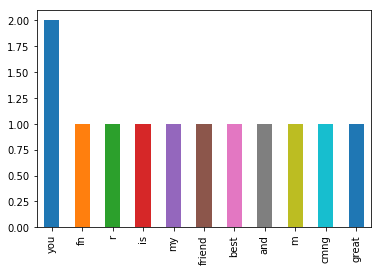

In [12]:
print("\n\nBar graph of words used by a female in Train Data")
Word_Count_F['Words'].value_counts().plot(kind='bar')



Bar graph of words used by a male in Train Data


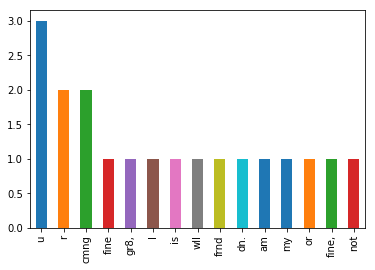

In [13]:
print("\n\nBar graph of words used by a male in Train Data")
Word_Count_M['Words'].value_counts().plot(kind='bar')



Bar graph of words used by a female in Test Data


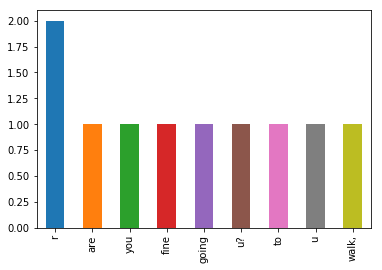

In [14]:
print("\n\nBar graph of words used by a female in Test Data")
Word_Count_TF['Words'].value_counts().plot(kind='bar')



Bar graph of words used by a male in Test Data


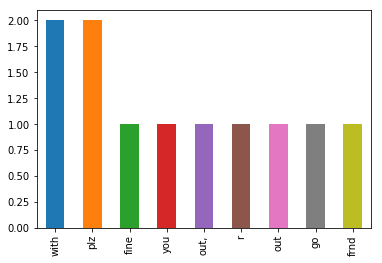

In [15]:
print("\n\nBar graph of words used by a male in Test Data")
Word_Count_TM['Words'].value_counts().plot(kind='bar')

___
___
___
___
___
___
___
___
___
___
___

___
___
___
___
___
___
___
___
___
___
___

### Pre-Process Data

In [16]:
import string
def pre_process(df):
    z=0;
    for i in df['comment_text']:
        temp_string=re.sub(r'[^\w\s]','',i)
        df['comment_text'][z]=''.join([i for i in temp_string if not i.isdigit()])
        z=z+1
    return df['comment_text']

print("\n\nTrain dataset before pre-processing:\n")
print(Train_Dataset)

Train_Dataset['comment_text']=pre_process(Train_Dataset)

print("\n\n\n\nTrain dataset after pre-processing:\n") 
print(Train_Dataset)



Train dataset before pre-processing:

              comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2      I am fine, r u fine    male
3             m fn and you  female
4  my frnd is gr8, wll dn.    male
5  my best friend is great  female




Train dataset after pre-processing:

              comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2       I am fine r u fine    male
3             m fn and you  female
4     my frnd is gr wll dn    male
5  my best friend is great  female


In [17]:
print("\n\nTest dataset before pre-processing:\n")
print(Test_Dataset)

Test_Dataset['comment_text']=pre_process(Test_Dataset)

print("\n\n\n\nTest dataset after pre-processing:\n") 
print(Test_Dataset)



Test dataset before pre-processing:

                         comment_text  gender
0  plz go out, plz out with with frnd    male
1             r u going to walk, r u?  female
2                          r you fine    male
3                        are you fine  female




Test dataset after pre-processing:

                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female


___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___

## Label Encoding for Train/Test Data
___

In [18]:
print("Train Dataset Labels Encoding:\n\n")

print(Train_Dataset)

Train_Dataset_AL=Train_Dataset.copy()

Gender_Fit=LabelEncoder().fit(Train_Dataset_AL['gender'])
Train_Dataset_AL['gender'] = Gender_Fit.transform(Train_Dataset_AL['gender'])
print("\nencoded_gender:")
print(Train_Dataset_AL['gender'])

Train Dataset Labels Encoding:


              comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2       I am fine r u fine    male
3             m fn and you  female
4     my frnd is gr wll dn    male
5  my best friend is great  female

encoded_gender:
0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int64


In [19]:
print("Test Dataset Labels Encoding:\n\n")

print(Test_Dataset)

Test_Dataset_AL=Test_Dataset.copy()

Gender_Fit_Test=LabelEncoder().fit(Test_Dataset_AL['gender'])
Test_Dataset_AL['gender'] = Gender_Fit_Test.transform(Test_Dataset_AL['gender'])
print("\nencoded_gender:")
print(Test_Dataset_AL['gender'])

Test Dataset Labels Encoding:


                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female

encoded_gender:
0    1
1    0
2    1
3    0
Name: gender, dtype: int64


## Feature Extraction – Changing Representation of Data “from String to Vector”

In [20]:
vect=CountVectorizer(
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1,1),
    max_features=10
)

print("Parameters of TfidfVectorizer and its values:\n\n")
print(vect)

Parameters of TfidfVectorizer and its values:


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)


In [21]:
Combined_Temp=pd.concat([Train_Dataset_AL,Test_Dataset_AL])
Temp_Fit = vect.fit(Combined_Temp['comment_text'])

Comment_Fit = vect.transform(Train_Dataset['comment_text'])
Feature_Names = vect.get_feature_names()
Data = Comment_Fit.toarray()
Train_Dataset_AL2 = pd.DataFrame(Data,columns=Feature_Names)
print("Train Features' Shape:",Train_Dataset_AL2.shape)

Comment_Fit_Test = vect.transform(Test_Dataset['comment_text'])
Feature_Names_Test = vect.get_feature_names()
Data_Test = Comment_Fit_Test.toarray()
Test_Dataset_AL2 = pd.DataFrame(Data_Test,columns=Feature_Names_Test)
print("Test Features' Shape:",Test_Dataset_AL2.shape)

Train Features' Shape: (6, 10)
Test Features' Shape: (4, 10)


In [22]:
print("Train Features Before Assigning a 'gender' Column:")
Train_Dataset_AL2

Train Features Before Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,plz,r,u
0,0,2,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,2,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0
5,1,0,0,0,0,1,0,0,0,0


In [23]:
print("Test Features Before Assigning a 'gender' Column:")
Test_Dataset_AL2

Test Features Before Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,plz,r,u
0,0,0,0,0,0,0,1,2,0,0
1,0,0,0,0,0,0,0,0,2,2
2,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0


In [24]:
print("Train Features after Assigning a 'gender' Column:")
Train_Dataset_AL3 = pd.concat([Train_Dataset_AL2,Train_Dataset_AL['gender']], axis=1)
Train_Dataset_AL3

Train Features after Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,plz,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0


In [25]:
print("Test Features after Assigning a 'gender' Column:")
Test_Dataset_AL3 = pd.concat([Test_Dataset_AL2,Test_Dataset_AL['gender']], axis=1)
Test_Dataset_AL3

Test Features after Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,plz,r,u,gender
0,0,0,0,0,0,0,1,2,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0


In [26]:
print("Train Features' Shape:",Train_Dataset_AL3.shape)
print("Test Features' Shape:",Test_Dataset_AL3.shape)

Train Features' Shape: (6, 11)
Test Features' Shape: (4, 11)


___
___
___
___
___
___
___
___
___

## Train ML Algorithms using Train Data
___

In [27]:
TrainX=Train_Dataset_AL3[['best','cmng','dn','fine','fn','friend','frnd','plz','r','u']] 
TrainY=Train_Dataset_AL3[['gender']]

TestX=Test_Dataset_AL3[['best','cmng','dn','fine','fn','friend','frnd','plz','r','u']]  
TestY=Test_Dataset_AL3[['gender']]

In [28]:
print("\t\t\tLogistic Regression:\n\nParameters and their values:\n")
lr=LogisticRegression()
lr.fit(TrainX, TrainY.values.ravel())

			Logistic Regression:

Parameters and their values:



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print("\t\t\tRandom Forest Classifier:\n\nParameters and their values:\n")
rfc=RandomForestClassifier()
rfc.fit(TrainX, TrainY.values.ravel())

			Random Forest Classifier:

Parameters and their values:



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
print("\t\t\tLinear SVC:\n\nParameters and their values:\n")
lsvc=LinearSVC()
lsvc.fit(TrainX, TrainY.values.ravel())

			Linear SVC:

Parameters and their values:



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
print("\t\t\tBernoulli NB:\n\nParameters and their values:\n")
bnb=BernoulliNB()
bnb.fit(TrainX, TrainY.values.ravel())

			Bernoulli NB:

Parameters and their values:



BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___
___

## Evaluate ML Algorithms using Test Data
___

In [47]:
print("Prediction using LogisticRegression:\n\n")
Lr_Prediction=lr.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit_Test.inverse_transform(Lr_Prediction))

Lr_AS=lr.score(TestX,TestY)
print("\n\nAccuracy score =",Lr_AS)

Prediction using LogisticRegression:


                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female


predicted_gender:

['male' 'male' 'male' 'male']


Accuracy score = 0.5


In [31]:
print("Prediction using RandomForestClassifier:\n\n")
Rfc_Prediction=rfc.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit_Test.inverse_transform(Rfc_Prediction))

Rfc_AS=rfc.score(TestX,TestY)
print("\n\nAccuracy score =",Rfc_AS)

Prediction using RandomForestClassifier:


                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female


predicted_gender:

['male' 'male' 'male' 'female']


Accuracy score = 0.75


In [33]:
print("Prediction using LinearSVC:\n\n")
Lsvc_Prediction=lsvc.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit_Test.inverse_transform(Lsvc_Prediction))

Lsvc_AS=lsvc.score(TestX,TestY)
print("\n\nAccuracy score =",Lsvc_AS)

Prediction using LinearSVC:


                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female


predicted_gender:

['male' 'male' 'female' 'female']


Accuracy score = 0.5


In [35]:
print("Prediction using BernoulliNB:\n\n")
Bnb_Prediction=bnb.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit_Test.inverse_transform(Bnb_Prediction))

Bnb_AS=bnb.score(TestX,TestY)
print("\n\nAccuracy score =",Bnb_AS)

Prediction using BernoulliNB:


                        comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you fine    male
3                       are you fine  female


predicted_gender:

['female' 'male' 'male' 'female']


Accuracy score = 0.5


___
___

## Selection of Best Model
___

In [36]:
DR=[('LogisticRegression',Lr_AS),('RandomForestClassifier',Rfc_AS),
   ('LinearSVC',Lsvc_AS),('BernoulliNB',Bnb_AS),]
t = Table(rows=DR, names=('Model', 'Accuracy'))
print("Detailed Performance of all the models:\n")
print(t)

Detailed Performance of all the models:

        Model          Accuracy
---------------------- --------
    LogisticRegression      0.5
RandomForestClassifier     0.75
             LinearSVC      0.5
           BernoulliNB      0.5


In [37]:
BM_Arr={'LogisticRegression':Lr_AS,'RandomForestClassifier':Rfc_AS,
        'LinearSVC':Lsvc_AS,'BernoulliNB':Bnb_AS}

import operator
Best_Model = max(BM_Arr.items(), key=operator.itemgetter(1))[0]

t2 = Table(rows=[(Best_Model,BM_Arr[Best_Model])], names=('Model', 'Accuracy'))
print("Best Model:\n")
print (t2)

Best Model:

        Model          Accuracy
---------------------- --------
RandomForestClassifier     0.75


___

## Application Phase
___

### Combine Data(Train+Test)

In [38]:
print("All Features in form of DataFrame:\n")

Combined_Dataset=pd.concat([Train_Dataset_AL3,Test_Dataset_AL3])
Combined_Dataset

All Features in form of DataFrame:



,best,cmng,dn,fine,fn,friend,frnd,plz,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1,2,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0


### Train Best Model on All Data

In [39]:
CombinedX=Combined_Dataset[['best','cmng','dn','fine','fn','friend','frnd','plz','r','u']] 
CombinedY=Combined_Dataset[['gender']]

rfc.fit(CombinedX,CombinedY.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Save the Trained Model as Pickle File

In [40]:
Combined_Rfc='C:\\Users\\AWAB\\Desktop\\test\\combined_rfc.sav'
pickle.dump(rfc,open(Combined_Rfc,'wb'))

___
___
___
___
___
___
___

## Make Prediction on Unseen/New Data
___

### Load the Trained Model

In [41]:
rfc = pickle.load(open(Combined_Rfc, 'rb'))

### Take Input from User

In [42]:
comment_text = input("Please enter your comment here: ")

Please enter your comment here: plz go out, plz out with with frnd


### Conver User Input into Feature Vector

In [43]:
temp_string=re.sub(r'[^\w\s]','',comment_text)
comment_text=''.join([i for i in temp_string if not i.isdigit()])

In [44]:
Comment_Fit_Unseen = vect.transform([comment_text])
Feature_Names_Unseen = vect.get_feature_names()
print("Vector features:",Feature_Names_Unseen)

Vector features: ['best', 'cmng', 'dn', 'fine', 'fn', 'friend', 'frnd', 'plz', 'r', 'u']


In [45]:
Data_Unseen = Comment_Fit_Unseen.toarray()
Feature_Vector = pd.DataFrame(Data_Unseen,columns=Feature_Names_Unseen)
print("User input features with weights:")
Feature_Vector

User input features with weights:


,best,cmng,dn,fine,fn,friend,frnd,plz,r,u
0,0,0,0,0,0,0,1,2,0,0


___

### Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [46]:
Unseen_Prediction = rfc.predict(Feature_Vector)
if Unseen_Prediction == 1:
    print("Male")
else:
    print("Female")

Male
